# InstaBot - Part 2

# 1.) Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

In [1]:
#IMPORTING ALL THE LIBRARIES :

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select


In [2]:
## LOG-IN TO INSTAGRAM ACCOUNT :

from selenium import webdriver
driver = webdriver.Chrome(executable_path = "chromedriver")

In [3]:
def login():
    
    driver.get('https://www.instagram.com/')
    time.sleep(3)
    user_name_text_box = driver.find_element_by_name('username')
    user_name_text_box.send_keys('interestingfacts2104')
    pass_text_box = driver.find_element_by_name('password')
    pass_text_box.send_keys('codingninjas21')
    pass_text_box.submit()
    time.sleep(3)
    
    try :
    
        save_info = driver.find_element_by_xpath('//button[contains(@class, "sqdOP")]')
        if save_info.is_enabled:
            save_info.click()
        
        time.sleep(2)
        
        notification = driver.find_element_by_xpath('//button[contains(@class, "HoLwm")]')
        if notification.is_enabled:
            notification.click()
        
    except NoSuchElementException:
        pass
        
    

In [4]:
login()

### 1.1) : From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [45]:
#creating a function for searching:

def text_box_search(search):
    text_box = driver.find_element_by_class_name('XTCLo')
    text_box.clear() #clearing it so that if some other thing is written in it then it is removed first
    text_box.send_keys(search)
    

In [8]:
def insta_handles():
    text_box_search('food')
    time.sleep(3)
    li = driver.find_elements_by_class_name('-qQT3')
    insta_handles = []
    handles = []

    for i in li:
        if('locations' not in i.get_attribute('href')) and ('tags' not in i.get_attribute('href')):
                insta_handles.append(i)

    for j in range(10):
        handles.append(insta_handles[j].find_element_by_class_name('uL8Hv').text)
        

    return handles

In [33]:
ans = insta_handles()
ans

['foodtalkindia',
 'hey_foodies3',
 'streetfoodie7',
 'food_lunatic',
 'food.babyy_',
 'foodie_incarnate',
 'food',
 'foodie_muscle_man',
 'delhifoodguide',
 'street_food_chandigarh']

In [46]:
def open_profile(profile_name):
    text_box_search(profile_name)
    time.sleep(3)
    driver.find_element_by_class_name('-qQT3').click()

In [35]:
all_followers = []
for i in ans:
    open_profile(i)
    time.sleep(3)
    f = driver.find_elements_by_class_name('g47SY')[1]
    n = f.get_attribute('title').replace(',','')
    all_followers.append(int(n))
    driver.back()
    time.sleep(3)
    
ans = np.array(ans)
all_followers = np.array(all_followers)

ans = ans[np.argsort(all_followers)][::-1]
all_followers = all_followers[np.argsort(all_followers)][::-1]    

for i in range(5):
    print(ans[i],all_followers[i])
    



    



foodie_incarnate 890209
food 307444
foodtalkindia 307444
food_lunatic 124540
streetfoodie7 118181


In [ ]:
###############################################################################################################################

### Q(1.2) Now Find the number of posts these handles have done in the previous 3 days.

In [41]:
def text_box_search(search):
    text_box = driver.find_element_by_class_name('XTCLo')
    text_box.clear() #clearing it so that if some other thing is written in it then it is removed first
    text_box.send_keys(search)


In [42]:
def open_profile(profile_name):
    text_box_search(profile_name)
    time.sleep(3)
    driver.find_element_by_class_name('-qQT3').click()

In [43]:
top_handles = ['foodie_incarnate', 'food', 'foodtalkindia', 'food_lunatic', 'streetfoodie']
top_handles

['foodie_incarnate', 'food', 'foodtalkindia', 'food_lunatic', 'streetfoodie']

In [44]:
new_posts = []
for i in top_handles:
    open_profile(i)
    time.sleep(3)
    post = driver.find_element_by_class_name('_9AhH0')
    post.click()
    time.sleep(3)
    
    count = 0
    while True:
        date = WebDriverWait(driver, 7).until(EC.presence_of_element_located((By.CLASS_NAME, "_1o9PC ")))
        d = date.text.split()
        if len(d) < 3 or (d[1] == 'DAYS' and int(d[0]) > 3):
            break
        count += 1
        next_post = driver.find_element_by_class_name('l8mY4')
        next_post.click()
        time.sleep(3)
        
    new_posts.append(count)
    close = driver.find_element_by_class_name('qJPeX')
    close.click()
    time.sleep(3)
    
for i in range(5):
    print(top_handles[i], ":", new_posts[i])
    


foodie_incarnate : 6
food : 2
foodtalkindia : 2
food_lunatic : 3
streetfoodie : 11


### Q(1.3) Plotting the graph for above data

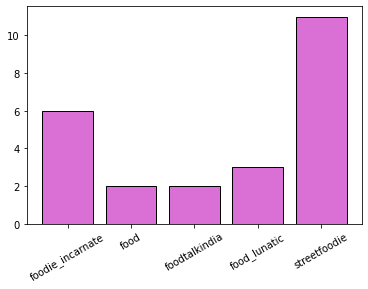

In [45]:
plt.bar(top_handles, new_posts, color = 'orchid', edgecolor = 'black')
plt.xticks(rotation = 30)
plt.show()

# 2.) Your friend also needs a list of hashtags that he should use in his posts

## 2.1) Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [12]:
top_handles = ['foodie_incarnate', 'food', 'foodtalkindia', 'food_lunatic', 'streetfoodie']
top_handles

['foodie_incarnate', 'food', 'foodtalkindia', 'food_lunatic', 'streetfoodie']

In [13]:
contents = []
for i in top_handles:
    open_profile(i)
    time.sleep(3)
    post = driver.find_element_by_class_name('_9AhH0')
    post.click()
    time.sleep(3)
    print('Posts OF Insta-Handles :', i)
    for i in range(10):
        post_content = WebDriverWait(driver,7).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class,"C4VMK")]/span')))
        contents.append(post_content.text)
        print()
        print(str(i+1) + ".)" + post_content.text)
        print('------------------------------------------------------------------------------------------------------------')
        next_post = driver.find_element_by_class_name('l8mY4')
        next_post.click()
        time.sleep(3)
        
    print()
    print('----------------------------------------------------------------------------------------------------------------')
    print()
    close = driver.find_element_by_class_name('qJPeX')
    close.click()

Posts OF Insta-Handles : foodie_incarnate

1.)20 Minute में 25 Momos खाओ, 5100/- RS CASH घर ले जाओ😱😱

Kindly watch the full video for location, price & other details🤗🤗
.
#foodieincarnate #sodelhi #newdelhi #foodtalkindia #delhigram #indianfood #delhifoodblogger #foodgasm #foodporn #foodpornshare #foodlover #foodgram #foodiesofinstagram #foodie #indianstreetfood #streetfood #delhistreetfood #streetfoodindia #mumbaistreetfood #delhifoodie #foodblogger #indianfoodie #desikhana #indianfoodblogger #indianfoodbloggers #delhifood #mumbai #delhi #momo #momochallenge
------------------------------------------------------------------------------------------------------------

2.)Famous Jai Shankar Lassi of Surat🤩🤩
.
Watch the full video on YouTube. Link is in my bio🤗🤗
.
#Foodieincarnate #Reelitfeelit #reelkarofeelkaro #reelsinstagram #reels #streetfood #lassi #surat #viralfood #reelfood
------------------------------------------------------------------------------------------------------------




5.)Hong Kong Wine & Dine Festival 2021 - a festival featuring an array of refreshing and trending food and drink experiences with a whole month of indulgence only at the culinary capital of Asia. Here we have @shuchirsuri, giving an ode to the exquisite flavors of the city of Hong Kong with his unique take on the city's culture stemming from the idea of "East meets West". Shuchir has created "Hong Kong Negroni" a zero-waste cocktail. Inspired by the city of Hong Kong that offers a plethora of versatile flavors and tastes- this cocktail comes with a creative mix of local flavors along with influences from Western culture, making for a perfect 'East meets West' combination true to Hong Kong culture. Here's how you prep it:
Gin- 30ml
Campari- 30ml
Martini Rosso- 30ml
{All mixed and infused with Ginger and roasted Sesame.}
Garnish: Roasted Sesame and Ginger brittle {Made from the leftover ginger and sesame seed}
 
-Add all 3 ingredients to a mixing glass and pour it into a jar
-Add roaste


6.)Hong Kong Wine & Dine Festival 2021 - a festival featuring an array of refreshing and trending food and drink experiences with a whole month of indulgence only at the culinary capital of Asia. Here we have @_gauravsareen, giving an ode to the exquisite flavors of the city of Hong Kong with his unique take on the Hong Kong-style Milk Tea. Gaurav has created "Milk & Cha" a refreshing and comforting cocktail creation that draws its inspiration from the famous local drink, Hong Kong-style milk tea! Here's how you prep it:

Bourbon- 60ml Lime juice- 20ml Black tea cordial-15ml
Garnish- rosemary

-Washed with full cream milk - Allowing the milk to curdle
-Clarified using a filter paper
- Stir the clear spirit with some ice
- Add in some rosemary smoke
- Pour in old fashioned glasses with a block of clear ice
Discover more about the glamour of everything food and drink at the Hong Kong Wine and Dine Festival. Head over to their website https://bit.ly/HKWnDF2021 and let your taste buds wan


10.)कुछ तो बात है इन पहाड़ों में, जितना भी देखलो जी नहीं भरता।😍
Koi guess kar paya location?📍
.
#reelsvideo #relatable #feelitreelit #delhi_igers #delhifoodie #viralreels #lifestyleblogger #foodblogger #delhi #blogger #explorepage #all_shots #explore #reelsinstagram #feelkaroreelkaro #reel #travel #travelphotography #travelblogger #travelgram #mountains #mountain #eatingfortheinsta #fun #reels
------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------

Posts OF Insta-Handles : streetfoodie

1.)East or West biryani is the Best 🤤🤤 #chickenbiryani #biryani
.
Tag Your Favourite Person In Your life ❤️😍
.

•
FOLLOW 🍴@streetfoodie7
FOLLOW 🍴@streetfoodie7
FOLLOW 🍴@streetfoodie7
•
Follow us for more foodies Updates 👇
••
Use Hashtag #streetfoodie7 to get featured!
Turn on Your Post Notifications 👈
•
#biryanilovers #chickenwings ##foo

## 2.2) Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [14]:
data = []
dict_ = {}
for i in contents:
    for j in i.split('/n'):
        for w in j.split():
            if '.' not in w:
                dict_[w] = dict_.get(w,0) + 1
for key, val in dict_.items():
    data.append([key,val])
    print(key, ":", val)

20 : 1
Minute : 1
में : 1
25 : 1
Momos : 3
खाओ, : 1
5100/- : 1
RS : 1
CASH : 1
घर : 1
ले : 1
जाओ😱😱 : 1
Kindly : 3
watch : 3
the : 118
full : 8
video : 6
for : 26
location, : 3
price : 3
& : 19
other : 4
details🤗🤗 : 3
#foodieincarnate : 7
#sodelhi : 7
#newdelhi : 6
#foodtalkindia : 19
#delhigram : 6
#indianfood : 16
#delhifoodblogger : 13
#foodgasm : 4
#foodporn : 8
#foodpornshare : 4
#foodlover : 4
#foodgram : 4
#foodiesofinstagram : 4
#foodie : 14
#indianstreetfood : 4
#streetfood : 17
#delhistreetfood : 5
#streetfoodindia : 5
#mumbaistreetfood : 4
#delhifoodie : 10
#foodblogger : 17
#indianfoodie : 15
#desikhana : 5
#indianfoodblogger : 4
#indianfoodbloggers : 5
#delhifood : 5
#mumbai : 4
#delhi : 9
#momo : 2
#momochallenge : 1
Famous : 2
Jai : 1
Shankar : 1
Lassi : 1
of : 82
Surat🤩🤩 : 1
Watch : 3
on : 40
Link : 3
is : 19
in : 37
my : 10
bio🤗🤗 : 3
#Foodieincarnate : 3
#Reelitfeelit : 3
#reelkarofeelkaro : 3
#reelsinstagram : 8
#reels : 4
#lassi : 1
#surat : 1
#viralfood : 2
#reelfood

#kfc : 2
#kolkatafoodie : 2
#drumsticks : 3
LITTI : 1
CHOKHA : 1
🤤🤤In : 1
DESI : 1
STYLE : 1
🔥🔥 : 1
#littichokha : 1
#streetfood#biharfood : 1
#igtv : 1
#dilsefoodie : 1
India’s : 1
Biggest : 1
Egg’s : 1
Chicken : 4
Roll : 2
/ : 1
KG : 1
Ka : 1
Anda : 1
ONLY : 1
At : 1
Shiva : 1
Egg : 1
300 : 1
/- : 1
Sirsa : 1
gate : 1
#eggrolls : 1
streetfood#egg : 1
Winter : 1
Special : 1
Steam : 1
🤤🤤🤤🔥🔥 : 1
Kisko : 1
Pasand : 1
Hai : 1
karo : 3
Treat : 1
mera : 1
Taraf : 1
se : 1
😍😍 : 2
Taste : 1
8/10 : 1
₹30/- : 1
📍Sector : 1
Chhattisgarh : 1
@streetfoodie7 : 1
#momos : 1
#foodbossindia : 1
#zingyzest : 1
#buzzfeedfood : 1
#Desi : 1
#chickenlover : 1
#bhilaians : 1
#foodies : 1
#chinesefood : 1
TAG : 1
YOUR : 1
KFC : 1
LOVER : 1
GIRL : 1
FRIEND❤️😍 : 1
Bucket : 1
499/- : 1
#india : 1
#kfcchicken : 1
#streetfood#chickenlover : 1
DRUMSTICKS : 1
🍗🍗🍗🍗🍗🍗 : 1
Partner : 1
😋😋 : 1
#nonveglovers : 1
#streetfood#mumbaifoodie : 1
#kolkatablogger : 1
Guess : 1
What : 1
Jaldi : 1
address : 1
section : 1
main : 1

## 2.3) Create a csv file with two columns : the word and its frequency.

In [15]:
df = pd.DataFrame(data, columns = ["Words", "Frequency"])
df.to_csv('freq.csv', index = False)
df

,Words,Frequency
0,20,1
1,Minute,1
2,में,1
3,25,1
4,Momos,3
...,...,...
1170,OR,1
1171,Kadai😋😋🤤🤤,1
1172,😍,1
1173,#butterchicken,1


## 2.4) Now, find the hashtags that were most popular among these bloggers

In [23]:
hashtags = []
for w in dict_:
    if w[0] == '#':
        hashtags.append([dict_[w], w])
hashtags.sort(reverse = True)
for i in hashtags:
    print(i[1],i[0])
        

#foodtalkindia 19
#streetfoodie7 17
#streetfood 17
#foodblogger 17
#indianfood 16
#indianfoodie 15
#foodie 14
#delhifoodblogger 13
#foodphotography 12
#foodphoto 11
#desifood 11
#spicyfood 10
#instafood 10
#foodtraveller 10
#delhifoodie 10
#chicken 10
#briyani 10
#biryanilove 10
#foodindia 9
#delhi 9
#buzzfeast 9
#reelsinstagram 8
#foodporn 8
#dessert 8
#chennaifoodie 8
#HotFind 8
#tasty 7
#sodelhi 7
#icecreams 7
#foodieincarnate 7
#delhi_igers 7
#chennaifood 7
#chennai 7
#all_shots 7
#newdelhi 6
#mumbaifoodie 6
#foodblog 6
#food 6
#explorepage 6
#explore 6
#discoverhongkong 6
#delhigram 6
#streetfoodindia 5
#reel 5
#indianfoodbloggers 5
#feelkaroreelkaro 5
#desikhana 5
#delhistreetfood 5
#delhifood 5
#comfortfood 5
#chennaifoodblogger 5
#zerowastecocktail 4
#viralreels 4
#sustainablecocktails 4
#reelsvideo 4
#reels 4
#mumbaistreetfood 4
#mumbai 4
#lifestyleblogger 4
#indianstreetfood 4
#indianfoodblogger 4
#hongkong 4
#hk 4
#foodpornshare 4
#foodlover 4
#foodiesofinstagram 4
#foodgram

## 2.5) Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

#foodtalkindia 19
#streetfoodie7 17
#streetfood 17
#foodblogger 17
#indianfood 16


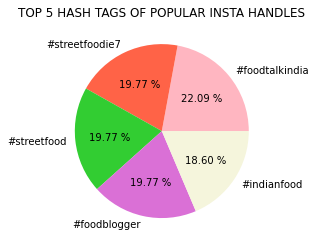

In [29]:
top_hash = []
freq = []

for h in hashtags[:5]:
    top_hash.append(h[1])
    freq.append(h[0])
    print(h[1], h[0])
    
plt.pie(freq, labels = top_hash, colors = ['lightpink','tomato','limegreen','orchid','beige'], autopct = '%.2f %%')
plt.title( 'TOP 5 HASH TAGS OF POPULAR INSTA HANDLES')
plt.show()

# 3.) You need to also calculate average followers : likes ratio for the obtained handles.
## Followers : Likes ratio is calculated as follows:

## 3.1) Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [5]:
top_handles = ['foodie_incarnate', 'food', 'foodtalkindia', 'food_lunatic', 'streetfoodie']
top_handles

['foodie_incarnate', 'food', 'foodtalkindia', 'food_lunatic', 'streetfoodie']

In [6]:
def text_box_search(search):
    text_box = driver.find_element_by_class_name('XTCLo')
    text_box.clear() #clearing it so that if some other thing is written in it then it is removed first
    text_box.send_keys(search)

In [7]:
def open_profile(profile_name):
    text_box_search(profile_name)
    time.sleep(3)
    driver.find_element_by_class_name('-qQT3').click()

In [8]:
likes = []
for i in top_handles:
    open_profile(i)
    time.sleep(3)
    post = driver.find_element_by_class_name('_9AhH0')
    post.click()
    time.sleep(3)
    l = []
    print('LIKES OF Insta-Handles :', i)
   
    for i in range(10):
        try:
            like_info = WebDriverWait(driver,3).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class,"Nm9Fw")]/a/span')))
            l.append(like_info.text)
            print()
            print("Post" + str(i + 1) + " : " + like_info.text + " Likes")
            
        except:
            views_info = WebDriverWait(driver,3).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class,"HbPOm")]/span/span')))
            l.append(views_info.text)
            print()
            print("Post" + str(i + 1) + " : " + views_info.text + " Views")
            
        next_post = driver.find_element_by_class_name('l8mY4')
        next_post.click()
        time.sleep(3)
        
    likes.append(l)
    print()
    print('*................................*................................*.............................*.......................*..................................................................................................................')
    print()
        
   
    close = driver.find_element_by_class_name('qJPeX')
    close.click()
            


LIKES OF Insta-Handles : foodie_incarnate

Post1 : 53,454 Views

Post2 : 24,553 Likes

Post3 : 18,105 Likes

Post4 : 195,507 Views

Post5 : 22,457 Likes

Post6 : 17,170 Likes

Post7 : 218,508 Views

Post8 : 39,901 Likes

Post9 : 28,175 Likes

Post10 : 238,827 Views

*................................*................................*.............................*.......................*..................................................................................................................

LIKES OF Insta-Handles : food

Post1 : 436 Likes

Post2 : 3,290 Views

Post3 : 272 Likes

Post4 : 10,589 Views

Post5 : 8,552 Views

Post6 : 11,999 Views

Post7 : 1,026 Likes

Post8 : 404 Likes

Post9 : 333 Likes

Post10 : 2,529 Likes

*................................*................................*.............................*.......................*..................................................................................................................

LIKES OF Insta-Handles 

## 3.2 ) Calculate the average likes for a handle.

In [19]:
print(likes) #It is a list of list which contains the likes on first 10 post of top 5 insta-handles.

[['53,454', '24,553', '18,105', '195,507', '22,457', '17,170', '218,508', '39,901', '28,175', '238,827'], ['436', '3,290', '272', '10,589', '8,552', '11,999', '1,026', '404', '333', '2,529'], ['436', '3,290', '272', '10,589', '8,552', '11,999', '1,026', '404', '333', '2,529'], ['583', '1,909', '722', '836', '3,662', '21,251', '4,577', '761', '634', '1,756'], ['1,155', '676', '344', '4,746', '6,962', '16,294', '761', '1,670', '1,027', '11,064']]


In [11]:
top_handles = ['foodie_incarnate', 'food', 'foodtalkindia', 'food_lunatic', 'streetfoodie']
top_handles

['foodie_incarnate', 'food', 'foodtalkindia', 'food_lunatic', 'streetfoodie']

In [18]:
avg_likes = []

for i in range(5):
    like = likes[i] #it contains a list of likes on the post of a particular insta handle
    sum = 0
    for j in like:
        n = int(j.replace(',',''))
        sum += n
        
    avg = sum / 10  #average_likes = total_likes / no. of posts
    avg_likes.append(avg) #creating a list of average likes of top 5 insta handles.
    print("Average Likes on the post of Insta-Handle" + " " + top_handles[i] + " is " + " --------> " + str(avg))

Average Likes on the post of Insta-Handle foodie_incarnate is  --------> 85665.7
Average Likes on the post of Insta-Handle food is  --------> 3943.0
Average Likes on the post of Insta-Handle foodtalkindia is  --------> 3943.0
Average Likes on the post of Insta-Handle food_lunatic is  --------> 3669.1
Average Likes on the post of Insta-Handle streetfoodie is  --------> 4469.9


## 3.3) Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [32]:
top_followers = [ 890209,307444,307444,124540,118181] #this is the list we have obtained while calculating the followers of
top_followers                                          #top 5 handles.

[890209, 307444, 307444, 124540, 118181]

In [33]:
top_handles = ['foodie_incarnate', 'food', 'foodtalkindia', 'food_lunatic', 'streetfoodie']
top_handles

['foodie_incarnate', 'food', 'foodtalkindia', 'food_lunatic', 'streetfoodie']

In [34]:
ratio = []

for i in range(5):
    r = avg_likes[i] / top_followers[i]
    ratio.append(r)
    print("Ratio for Insta-Handle" + " " + top_handles[i] + " : " + str(r))

Ratio for Insta-Handle foodie_incarnate : 0.09623099743992702
Ratio for Insta-Handle food : 0.012825099855583456
Ratio for Insta-Handle foodtalkindia : 0.012825099855583456
Ratio for Insta-Handle food_lunatic : 0.029461217279588885
Ratio for Insta-Handle streetfoodie : 0.03782249261725658


## 3.4) Create a bar graph to depict the above obtained information.

In [35]:
top_handles

['foodie_incarnate', 'food', 'foodtalkindia', 'food_lunatic', 'streetfoodie']

In [36]:
ratio

[0.09623099743992702,
 0.012825099855583456,
 0.012825099855583456,
 0.029461217279588885,
 0.03782249261725658]

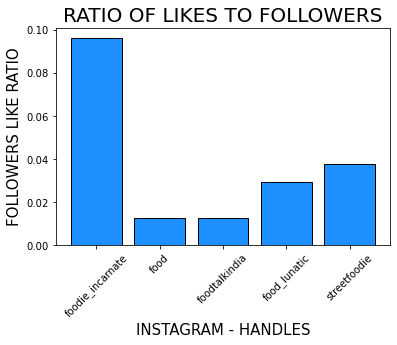

In [39]:
plt.bar(top_handles,ratio, color = 'dodgerblue', edgecolor = 'black')
plt.xticks(rotation = 45)
plt.title('RATIO OF LIKES TO FOLLOWERS', fontsize = 20)
plt.xlabel('INSTAGRAM - HANDLES', fontsize = 15)
plt.ylabel('FOLLOWERS LIKE RATIO', fontsize = 15)
plt.show()